<a href="https://colab.research.google.com/github/Sanazdalvandi/Colab/blob/main/regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*italicized text*# `regression`

In [ ]:
%%capture
!pip install ipython-autotime
from tensorflow.keras.datasets import boston_housing
import numpy as np
from tensorflow.keras import Sequential
from tensorflow.keras import layers
import matplotlib.pyplot as plt
(train_data,train_labels),(test_data,test_labels)=boston_housing.load_data()

In [ ]:
train_data.shape

(404, 13)

In [ ]:
train_data[0]


array([  1.23247,   0.     ,   8.14   ,   0.     ,   0.538  ,   6.142  ,
        91.7    ,   3.9769 ,   4.     , 307.     ,  21.     , 396.9    ,
        18.72   ])

In [ ]:
mean=train_data.mean(axis=0)
std=train_data.std(axis=0)
train_data=train_data-mean
train_data=train_data/std
train_data

array([[-0.27224633, -0.48361547, -0.43576161, ...,  1.14850044,
         0.44807713,  0.8252202 ],
       [-0.40342651,  2.99178419, -1.33391162, ..., -1.71818909,
         0.43190599, -1.32920239],
       [ 0.1249402 , -0.48361547,  1.0283258 , ...,  0.78447637,
         0.22061726, -1.30850006],
       ...,
       [-0.40202987,  0.99079651, -0.7415148 , ..., -0.71712291,
         0.07943894, -0.67776904],
       [-0.17292018, -0.48361547,  1.24588095, ..., -1.71818909,
        -0.98764362,  0.42083466],
       [-0.40422614,  2.04394792, -1.20161456, ..., -1.30866202,
         0.23317118, -1.15392266]])

# model design

In [ ]:
%load_ext outotime
def build_model():
 model =Sequential([
 layers.Dense(64, activation="relu",input_shape=(13,)), layers.Dense(64, activation="relu"),
 layers.Dense(1)
 ])
 model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])
 return model

ModuleNotFoundError: ignored

In [ ]:
model=build_model()
model.summary()
history=model.fit(train_data,train_labels,
batch_size=16,
epochs=20,
validation_split=0.2)


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 64)                896       
                                                                 
 dense_7 (Dense)             (None, 64)                4160      
                                                                 
 dense_8 (Dense)             (None, 1)                 65        
                                                                 
Total params: 5121 (20.00 KB)
Trainable params: 5121 (20.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/20
21/21 [==============================] - 1s 11ms/step - loss: 514.1595 - mae: 20.6518 - val_loss: 509.3141 - val_mae: 20.6095
Epoch 2/20
21/21 [==============================] - 0s 4ms/step - loss: 383.2955 - mae: 17.4248 - val_loss: 375.7809 - val_mae: 17.2527
Epoch 3/20


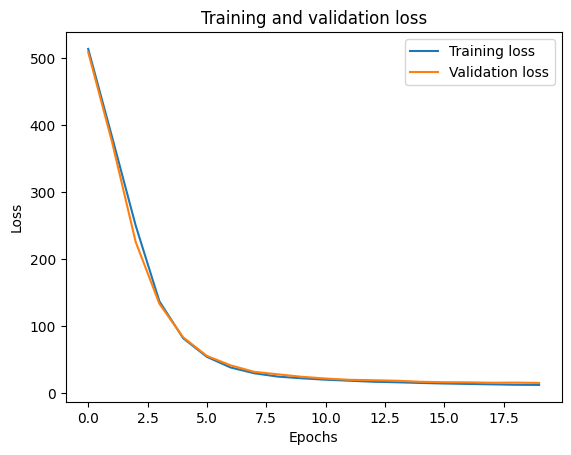

In [ ]:
losses = history.history["loss"]
val_loss = history.history["val_loss"]
plt.plot(losses, label="Training loss")
plt.plot(val_loss, label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()


In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
model1_sequential=keras.Sequential([
  layers.Input(shape=(3,)),
  layers.Dense(3,activation='relu'),
  layers.Dense(1,activation='sigmoid')
])
model1_sequential.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 3)                 12        
                                                                 
 dense_1 (Dense)             (None, 1)                 4         
                                                                 
Total params: 16 (64.00 Byte)
Trainable params: 16 (64.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
### functional model
from tensorflow import keras
from tensorflow.keras import layers
input=layers.Input(shape=(3,))
layer=layers.Dense(3,activation='relu')(input)
output=layers.Dense(1,activation='sigmoid')(layer)
model1_functional=keras.Model(inputs=input,outputs=output)
model1_functional.summary()


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 3)]               0         
                                                                 
 dense_6 (Dense)             (None, 3)                 12        
                                                                 
 dense_7 (Dense)             (None, 1)                 4         
                                                                 
Total params: 16 (64.00 Byte)
Trainable params: 16 (64.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
###save model
import json
model1_config = model1_functional.get_config()
with open('model1_config.json', 'w') as f:
    json.dump(model1_config, f, indent=4)
